# BFGS Algorithm

## Gradient Descent

In [ ]:
# example of plotting a gradient descent search on a one-dimensional function
from numpy import asarray
from numpy import arange
from numpy.random import rand
from matplotlib import pyplot

# objective function
def objective(x):
  return x**2.0

# derivative of objective function
def derivative(x):
  return x * 2.0

In [ ]:
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
  solutions, scores = list(), list()
  solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
  
  for i in range(n_iter):
    gradient = derivative(solution)
    solution = solution - step_size * gradient
    solution_eval = objective(solution)
    solutions.append(solution)
    scores.append(solution_eval)
    print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
  return [solutions, scores]

>0 f([0.52878124]) = 0.27961
>1 f([0.42302499]) = 0.17895
>2 f([0.33841999]) = 0.11453
>3 f([0.270736]) = 0.07330
>4 f([0.2165888]) = 0.04691
>5 f([0.17327104]) = 0.03002
>6 f([0.13861683]) = 0.01921
>7 f([0.11089346]) = 0.01230
>8 f([0.08871477]) = 0.00787
>9 f([0.07097182]) = 0.00504
>10 f([0.05677745]) = 0.00322
>11 f([0.04542196]) = 0.00206
>12 f([0.03633757]) = 0.00132
>13 f([0.02907006]) = 0.00085
>14 f([0.02325604]) = 0.00054
>15 f([0.01860484]) = 0.00035
>16 f([0.01488387]) = 0.00022
>17 f([0.0119071]) = 0.00014
>18 f([0.00952568]) = 0.00009
>19 f([0.00762054]) = 0.00006
>20 f([0.00609643]) = 0.00004
>21 f([0.00487715]) = 0.00002
>22 f([0.00390172]) = 0.00002
>23 f([0.00312137]) = 0.00001
>24 f([0.0024971]) = 0.00001
>25 f([0.00199768]) = 0.00000
>26 f([0.00159814]) = 0.00000
>27 f([0.00127851]) = 0.00000
>28 f([0.00102281]) = 0.00000
>29 f([0.00081825]) = 0.00000


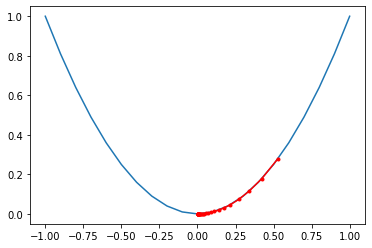

In [ ]:
# define range for input
bounds = asarray([[-1.0, 1.0]])
n_iter = 30
step_size = 0.1
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
results = objective(inputs)
pyplot.plot(inputs, results)
pyplot.plot(solutions, scores, '.-', color='red')
pyplot.show() 

## Newton's Method

In [ ]:
def newton_method(objective, derivative, bounds, n_iter, second_derivative):
  solutions, scores = list(), list()
  solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])

  for i in range(n_iter):
    gradient = derivative(solution)
    hessian = second_derivative(solution)
    solution = solution - gradient/hessian
    solution_eval = objective(solution)
    solutions.append(solution)
    scores.append(solution_eval)
    print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
  return [solutions, scores]

In [ ]:
bounds = asarray([[-1.0, 2.0]])
n_iter = 30
step_size = 0.1
solutions, scores = newton_method(objective, derivative, bounds, n_iter, second_derivative)
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
results = objective(inputs)
pyplot.plot(inputs, results)
pyplot.plot(solutions, scores, '.-', color='red')
pyplot.show()

NameError: ignored

## BFGS Algorithm

In [ ]:
from scipy.optimize import minimize
from numpy.random import rand

def objective(x):
  return x[0]**2.0 + x[1]**2.0

def derivative(x):
  return [x[0] * 2, x[1] * 2]

r_min, r_max = -5.0, 5.0
pt = r_min + rand(2) * (r_max - r_min)
result = minimize(objective, pt, method='BFGS', jac=derivative)

print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])

solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

TypeError: ignored